In [83]:
%matplotlib inline

In [84]:
from random import shuffle

parts_i = list(range(862))
shuffle(parts_i)

test_parts = parts_i[0:100]
train_parts = parts_i[100:]


In [165]:
import matplotlib.pyplot as plt

def show_loss_chart(history, output):
    loss = history.history[output + '_loss']
    val_loss = history.history['val_' + output + '_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss - ' + output)
    plt.legend()
    plt.show()
    
def show_accuracy_chart(history, output):
    acc = history.history[output + '_mean_absolute_error']
    val_acc = history.history['val_' + output + '_mean_absolute_error']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training mean_absolute_error')
    plt.plot(epochs, val_acc, 'b', label='Validation mean_absolute_error')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Abs Error - ' + output)
    plt.legend()
    plt.show()

In [147]:
import pandas as pd
import numpy as np

part_format = "/part{:04d}.csv"
base_dir = 'ENEM_2016_NORMALIZED'

def part_reader(parts):
    while True:
        for p in parts:
            data = pd.read_csv(base_dir + part_format.format(p))
            yield (data.drop(target_labels + ['Unnamed: 0'], axis=1).values,data[target_labels].values)

def part_reader_f(parts):
    while True:
        for p in parts:
            data = pd.read_csv(base_dir + part_format.format(p))
            y = data[target_labels].values.reshape((5,-1)).tolist()
            x = data.drop(target_labels + ['Unnamed: 0'], axis=1).values.reshape(-1,45)
            yield (x, y)

In [87]:
validation = train_parts[:50]
partial_train = train_parts[50:]
target_labels = ["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

In [150]:
from keras import models
from keras import layers
from keras.models import Model


inp = layers.Input((45,))
x = layers.Dense(512, activation='relu')(inp)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)

out1 = layers.Dense(1, activation='linear', name='NU_NOTA_MT')(x)
out2 = layers.Dense(1, activation='linear', name='NU_NOTA_CN')(x)
out3 = layers.Dense(1, activation='linear', name='NU_NOTA_CH')(x)
out4 = layers.Dense(1, activation='linear', name='NU_NOTA_LC')(x)
out5 = layers.Dense(1, activation='linear', name='NU_NOTA_REDACAO')(x)

model = Model(inputs=inp, outputs=[out1, out2, out3, out4, out5])

In [151]:
from keras import optimizers
from keras import metrics

rmsprop = optimizers.RMSprop(lr=0.001)

model.compile(optimizer=rmsprop, loss=['mse', 'mse', 'mse', 'mse', 'mse'], 
              metrics={ 'NU_NOTA_MT': 'mae',
                        'NU_NOTA_CN': 'mae',
                        'NU_NOTA_CH': 'mae',
                        'NU_NOTA_LC': 'mae',
                        'NU_NOTA_REDACAO': 'mae'})

In [90]:
target_labels

['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [152]:
history = model.fit_generator(part_reader_f(partial_train),
                              steps_per_epoch=len(partial_train),
                              epochs=15,
                              validation_data=part_reader_f(validation),
                              validation_steps=len(validation))

Epoch 1/15
712/712 [==============================] - 286s 401ms/step - loss: 85875.6842 - NU_NOTA_MT_loss: 17099.2171 - NU_NOTA_CN_loss: 17400.3270 - NU_NOTA_CH_loss: 17122.8575 - NU_NOTA_LC_loss: 17115.4435 - NU_NOTA_REDACAO_loss: 17137.8388 - NU_NOTA_MT_mean_absolute_error: 97.6579 - NU_NOTA_CN_mean_absolute_error: 97.3777 - NU_NOTA_CH_mean_absolute_error: 97.1766 - NU_NOTA_LC_mean_absolute_error: 97.2879 - NU_NOTA_REDACAO_mean_absolute_error: 97.4750 - val_loss: 108142.6852 - val_NU_NOTA_MT_loss: 21995.7033 - val_NU_NOTA_CN_loss: 20834.4829 - val_NU_NOTA_CH_loss: 21123.8256 - val_NU_NOTA_LC_loss: 21952.2704 - val_NU_NOTA_REDACAO_loss: 22236.4030 - val_NU_NOTA_MT_mean_absolute_error: 118.1393 - val_NU_NOTA_CN_mean_absolute_error: 113.9872 - val_NU_NOTA_CH_mean_absolute_error: 114.9791 - val_NU_NOTA_LC_mean_absolute_error: 117.8829 - val_NU_NOTA_REDACAO_mean_absolute_error: 118.8020
Epoch 2/15
712/712 [==============================] - 307s 431ms/step - loss: 66823.3191 - NU_NOTA_MT_

712/712 [==============================] - 215s 303ms/step - loss: 57640.4925 - NU_NOTA_MT_loss: 11493.0498 - NU_NOTA_CN_loss: 11512.1419 - NU_NOTA_CH_loss: 11519.0443 - NU_NOTA_LC_loss: 11535.1617 - NU_NOTA_REDACAO_loss: 11581.0950 - NU_NOTA_MT_mean_absolute_error: 81.3580 - NU_NOTA_CN_mean_absolute_error: 81.4693 - NU_NOTA_CH_mean_absolute_error: 81.4516 - NU_NOTA_LC_mean_absolute_error: 81.5399 - NU_NOTA_REDACAO_mean_absolute_error: 81.7090 - val_loss: 56586.1970 - val_NU_NOTA_MT_loss: 11212.2246 - val_NU_NOTA_CN_loss: 11282.7546 - val_NU_NOTA_CH_loss: 11397.4651 - val_NU_NOTA_LC_loss: 11286.4452 - val_NU_NOTA_REDACAO_loss: 11407.3071 - val_NU_NOTA_MT_mean_absolute_error: 81.1690 - val_NU_NOTA_CN_mean_absolute_error: 81.3867 - val_NU_NOTA_CH_mean_absolute_error: 81.8228 - val_NU_NOTA_LC_mean_absolute_error: 81.3607 - val_NU_NOTA_REDACAO_mean_absolute_error: 81.8209
Epoch 11/15
712/712 [==============================] - 215s 302ms/step - loss: 57254.3112 - NU_NOTA_MT_loss: 11426.5776

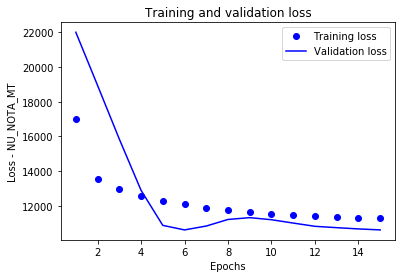

In [163]:
show_loss_chart(history, 'NU_NOTA_MT')

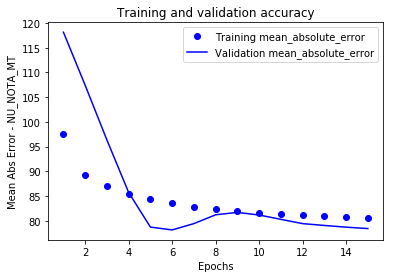

In [166]:
show_accuracy_chart(history, 'NU_NOTA_MT')